**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**LOADING THE DATA & PREPROCESSING THE DATA**

In [ ]:
calories_data = pd.read_csv("/content/calories.csv")

In [ ]:
calories_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise_data = pd.read_csv("/content/exercise.csv")

In [ ]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


**Inference:**

* We can observe an Indirect relationship between heart rate & body temperature with respect to the excercise the individual does.

**COMBINING THE EXCERCISE DATA & CALORIES DATA**

In [ ]:
combined_data = pd.concat([exercise_data,calories_data['Calories']], axis=1)

In [ ]:
combined_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
#checking the number of rows & columns
combined_data.shape

(15000, 9)

**Hence our combined_data has 15,000 people with 9 different features**

In [ ]:
#getting the information about the data most importantly to know about any missing values
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
#checking the missing values
combined_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [ ]:
#Performing one-hot encoding
combined_data.replace({'Gender':{'male':0,'female':1}},inplace=True)
combined_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


**ANALYSING THE DATA**

In [ ]:
#To get stastical measures about the data
combined_data.describe()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,0.503533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,1.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


**Important inference**
* Heart rate & body temperature is more when the person is doing excercise

**VISUALIZATION OF DATA**

In [ ]:
sns.set()

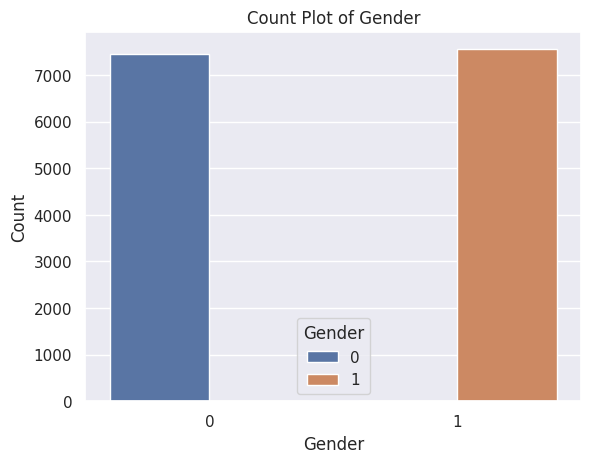

In [ ]:
#inorder to find the distribution of males & females
#plotting the gender column in count plot
sns.countplot(x='Gender', data=combined_data, hue='Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count Plot of Gender')
plt.show()

**From the above plot, we can observe that the data is evenly distributed(almost 7000) for both males and females.**

<ipython-input-63-5d5ad1d59026>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

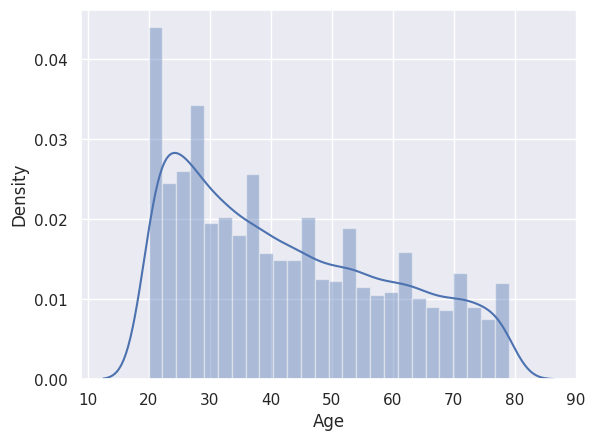

In [ ]:
#inorder to find the distribution of age column
sns.distplot(combined_data['Age'])

**From the above plot, we can observe that the Age column has the mean value of 42 and the data is positively skewed & most of the datapoints are in between 20 to 50.**
    

<ipython-input-35-5f5af3a137f0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

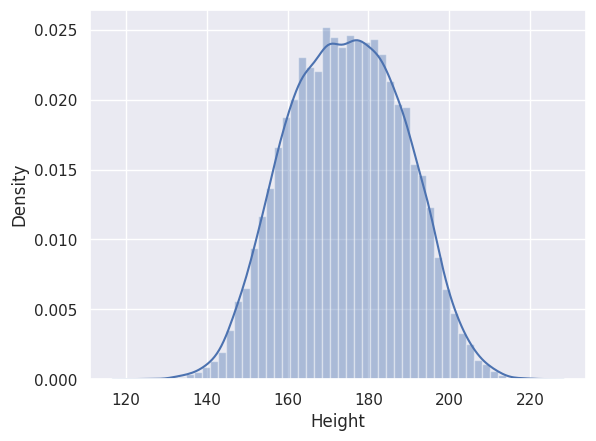

In [ ]:
#inorder to find the distribution of height column
sns.distplot(combined_data['Height'])

**Hence,from the above plot we can observe that the height data is normally distributed with mean of 174cm.**

<ipython-input-36-b183c258ee23>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

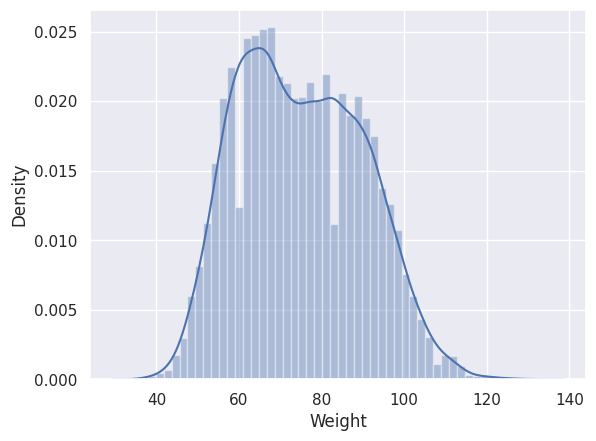

In [ ]:
#inorder to find the distribution of weight column
sns.distplot(combined_data['Weight'])

**Hence,from the above plot we can observe that the weight data is also normally distributed with mean of 74 kg**

<ipython-input-37-4d5600b7f1ce>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data['Duration'])


<Axes: xlabel='Duration', ylabel='Density'>

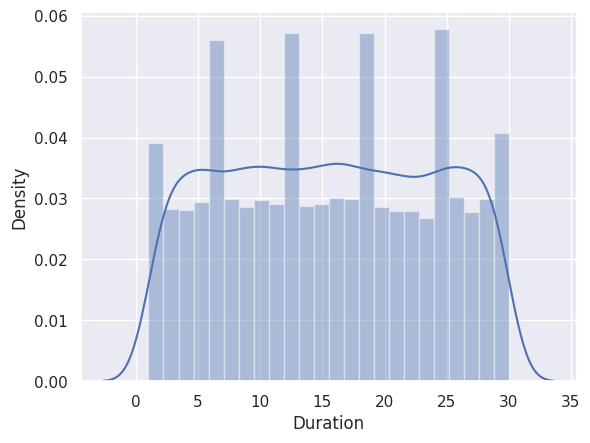

In [ ]:
sns.distplot(combined_data['Duration'])

**Hence, from the above plot we can observe that the duration data is a low peaked data with mean of 15mins**

<ipython-input-38-b534245d995e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data['Heart_Rate'])


<Axes: xlabel='Heart_Rate', ylabel='Density'>

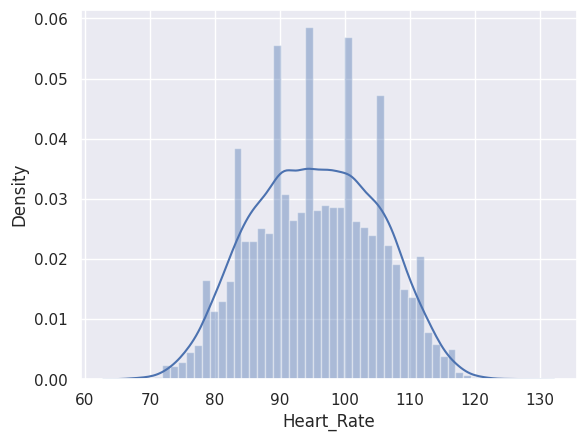

In [ ]:
sns.distplot(combined_data['Heart_Rate'])

**Hence,from the above plot we can observe that the heart rate column is normally distributed with mean of 95 heart beats with several outliers.**

<ipython-input-39-6380e2e61675>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_data['Body_Temp'])


<Axes: xlabel='Body_Temp', ylabel='Density'>

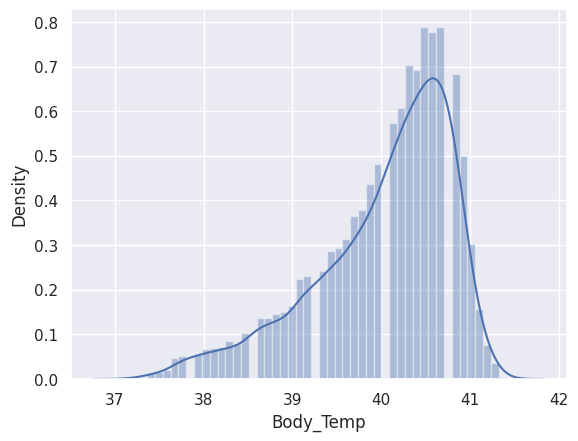

In [ ]:
sns.distplot(combined_data['Body_Temp'])

**Hence,from the above plot we can observe that the temperature column is negatively skewed with mean of 40.**

**TO FIND THE CORRELATION IN THE DATA**

Duration & calories are directly proportional=positively correlated


In [ ]:
correlation = combined_data.corr()

**Construction of heat map for the understanding of correlation**

<Axes: >

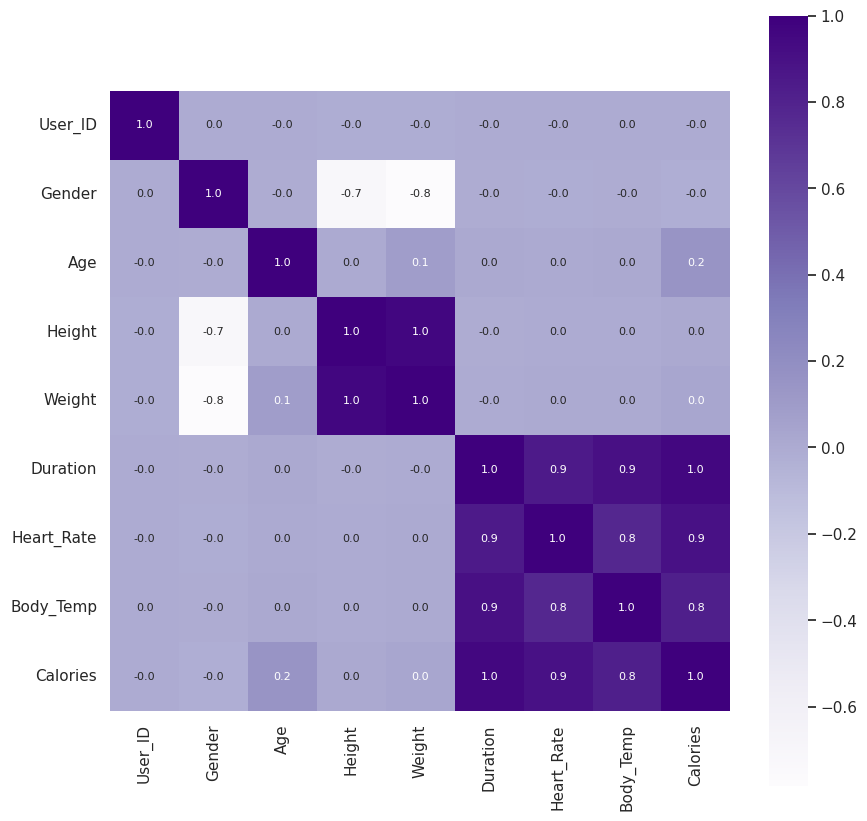

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Purples')

**SEPARATION OF FEATURES AND TARGET**

In [ ]:
X=combined_data.drop(['User_ID','Calories'],axis=1)
Y=combined_data['Calories']

In [ ]:
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
Y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

**SPLIT THE DATA INTO TRAINING DATA & TEST DATA**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
scaler.fit(X)


StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)


In [ ]:
standardized_data


array([[-1.00709181,  1.48472604,  1.08958204, ...,  1.61912727,
         0.98940395,  0.99402302],
       [ 0.99295813, -1.34217934, -0.59372619, ..., -0.1839901 ,
        -0.15846102,  0.3523425 ],
       [-1.00709181,  1.5436199 ,  0.31806577, ..., -1.26586052,
        -0.78456918, -1.70103518],
       ...,
       [ 0.99295813,  0.01237949, -1.08469109, ...,  0.05642555,
        -0.57586646,  0.09567029],
       [-1.00709181,  2.07366466,  1.29999557, ..., -1.62648399,
        -1.20197462, -2.21437961],
       [-1.00709181,  1.19025673, -0.10276129, ...,  0.2968412 ,
        -0.36716374,  0.60901471]])

In [ ]:
X = standardized_data

Hence, we can observe that
* X contains the orignal amount of data which is 15000
* X_train contains 80% of the data which is 12000
* X_test contains 20% of the data which is 3000

**MODEL IMPLEMENTATION : XGBoost Regressor**

In [ ]:
#loading the model
#model = XGBRegressor()

In [ ]:
#training the model with X_train
#model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**EVALUATION**

Evaluation is done by test data

**PREDICTION OF THE DATA**

In [ ]:
#Y_pred = model.predict(X_test)

In [ ]:
#Y_pred

**MEAN ABSOLUTE ERROR**

In [ ]:
#MAE = metrics.mean_absolute_error(Y_test, calories_burnt_prediction)

In [ ]:
#print("Mean Absolute Error = ",MAE)

Mean Absolute Error =  1.4833678883314132


**BUILDING A PREDICTIVE SYSTEM**
* Building a predictive system inorder to find the calories burnt for the first individual from the dataset

In [ ]:
input_data = (0,68,190.0,94.0,29.0,105.0,40.8,231)
#input_data_as_numpy_array = np.asarray(input_data)
#input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#prediction = model.predict(input_data_reshaped)
#print(prediction)
#print("The initial value is ",prediction[0])
print("The calories burnt for the first individual in the dataset is predicted as ", calories_burnt_prediction[0])

The calories burnt for the first individual in the dataset is predicted as  125.58828


In [ ]:
print("Thus we have successfully predicted the calories burnt using XGBoost")

Thus we have successfully predicted the calories burnt using XGBoost


In [ ]:
models = [LinearRegression, Lasso, Ridge, SVR, DecisionTreeRegressor, RandomForestRegressor, XGBRegressor]
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

for model in models:
    regressor = model().fit(X_train, Y_train)
    y_pred = regressor.predict(X_test)

    mae_scores.append(mean_absolute_error(Y_test, Y_pred))
    mse_scores.append(mean_squared_error(Y_test, Y_pred))
    rmse_scores.append(mean_squared_error(Y_test, Y_pred, squared=False))
    r2_scores.append(r2_score(Y_test, Y_pred))

In [ ]:
regression_metrics_df = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso", "Ridge", "SVR", "Decision Tree Regressor", "Random Forest Regressor", "XGBRegressor"],
    "Mean Absolute Error": mae_scores,
    "Mean Squared Error": mse_scores,
    "Root Mean Squared Error": rmse_scores,
    "R-squared (R2)": r2_scores
})

regression_metrics_df.set_index('Model', inplace=True)
regression_metrics_df

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared (R2)
Model,,,,
Linear Regression,1.483368,4.71071,2.170417,0.998801
Lasso,1.483368,4.71071,2.170417,0.998801
Ridge,1.483368,4.71071,2.170417,0.998801
SVR,1.483368,4.71071,2.170417,0.998801
Decision Tree Regressor,1.483368,4.71071,2.170417,0.998801
Random Forest Regressor,1.483368,4.71071,2.170417,0.998801
XGBRegressor,1.483368,4.71071,2.170417,0.998801
